In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1=pd.read_excel("/content/drive/MyDrive/Classification/D1_healthcare_dataset_stroke_data/D1_file1.xlsx",header=0)
df2=pd.read_excel("/content/drive/MyDrive/Classification/D1_healthcare_dataset_stroke_data/D1_file2.xlsx",header=0)
df3=pd.read_excel("/content/drive/MyDrive/Classification/D1_healthcare_dataset_stroke_data/D1_file3.xlsx",header=0)
df4=pd.read_excel("/content/drive/MyDrive/Classification/D1_healthcare_dataset_stroke_data/D1_target.xlsx",header=0)

In [4]:
df1

,id,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...
5105,18234,Yes,Private,Urban,83.75,NaN,never smoked
5106,44873,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,19723,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,37544,Yes,Private,Rural,166.29,25.6,formerly smoked


In [5]:
df2

,id,gender,age
0,9046,Male,67.0
1,51676,Female,61.0
2,31112,Male,80.0
3,60182,Female,49.0
4,1665,Female,79.0
...,...,...,...
5105,18234,Female,80.0
5106,44873,Female,81.0
5107,19723,Female,35.0
5108,37544,Male,51.0


In [6]:
df3.shape

(5110, 3)

In [7]:
df4.shape

(5110, 2)

In [8]:
Df1 = pd.merge(df1, df2, on='id')

In [9]:
Df2=pd.merge(df3, df4, on='id')

In [10]:
data=pd.merge(Df1, Df2, on='id')

In [11]:
data

,id,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender,age,hypertension,heart_disease,stroke
0,9046,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,0,1,1
1,51676,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,0,0,1
2,31112,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,0,1,1
3,60182,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,0,0,1
4,1665,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,1,0,0
5106,44873,Yes,Self-employed,Urban,125.20,40.0,never smoked,Female,81.0,0,0,0
5107,19723,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0,0,0
5108,37544,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0,0,0


In [12]:
data.dtypes

id                     int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
gender                object
age                  float64
hypertension           int64
heart_disease          int64
stroke                 int64
dtype: object

In [13]:

data.columns

Index(['id', 'ever_married', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'gender', 'age',
       'hypertension', 'heart_disease', 'stroke'],
      dtype='object')

In [14]:
 for col in ['id', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'gender','hypertension', 'heart_disease', 'stroke']:
   data[col] = data[col].astype('category')

In [15]:
data.describe(include="all")

,id,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender,age,hypertension,heart_disease,stroke
count,5110.0,5110,5110,5110,5110.000000,4909.000000,5110,5110,5110.000000,5110.0,5110.0,5110.0
unique,5110.0,2,5,2,NaN,NaN,4,3,NaN,2.0,2.0,2.0
top,67.0,Yes,Private,Urban,NaN,NaN,never smoked,Female,NaN,0.0,0.0,0.0
freq,1.0,3353,2925,2596,NaN,NaN,1892,2994,NaN,4612.0,4834.0,4861.0
mean,NaN,NaN,NaN,NaN,106.147677,28.893237,NaN,NaN,43.226614,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,45.283560,7.854067,NaN,NaN,22.612647,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,55.120000,10.300000,NaN,NaN,0.080000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,77.245000,23.500000,NaN,NaN,25.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,91.885000,28.100000,NaN,NaN,45.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,114.090000,33.100000,NaN,NaN,61.000000,NaN,NaN,NaN


<Axes: >

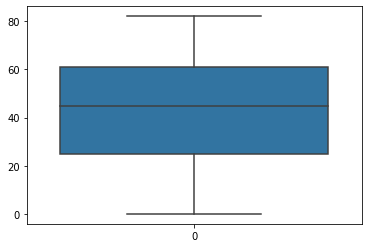

In [16]:
sns.boxplot(data['age'])

<Axes: >

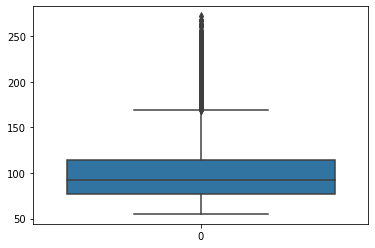

In [17]:
sns.boxplot(data['avg_glucose_level'])

<Axes: >

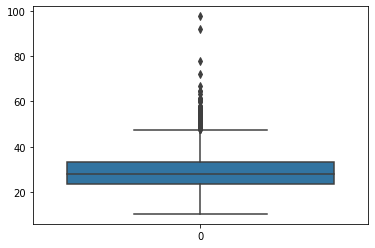

In [18]:
sns.boxplot(data['bmi'])

In [19]:
data.drop(columns=["id","bmi","avg_glucose_level"],axis=1,inplace=True)

<ipython-input-20-4d6d5f5e6678>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color ='red',bins=5)


<Axes: xlabel='age', ylabel='Density'>

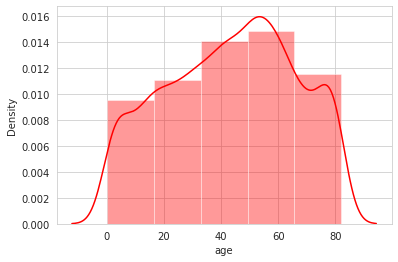

In [20]:
sns.set_style('whitegrid')
sns.distplot(data['age'], color ='red',bins=5)

In [21]:
data['age']=pd.cut(data['age'], [0,20,40,60,80,100] ,labels=["1","2","3","4","5"] , right=True)

In [29]:
 for col in [ 'age','ever_married', 'work_type', 'Residence_type', 'smoking_status', 'gender','hypertension', 'heart_disease', 'stroke']:
   data[col] = data[col].astype('object')

In [30]:
data['ever_married'].mask(data['ever_married'] == "Yes", 1, inplace=True)
data['ever_married'].mask(data['ever_married'] ==  "No", 0, inplace=True)

In [ ]:
data['work_type'].mask(data['work_type'] == "Private", 1, inplace=True)
data['work_type'].mask(data['work_type'] ==  "Self-employed", 2, inplace=True)
data['work_type'].mask(data['work_type'] ==  "children", 3, inplace=True)
data['work_type'].mask(data['work_type'] ==  "Govt_job", 4, inplace=True)
data['work_type'].mask(data['work_type'] ==  "Never_worked", 5, inplace=True)

In [34]:
data['Residence_type'].mask(data['Residence_type'] == "Urban", 1, inplace=True)
data['Residence_type'].mask(data['Residence_type'] ==  "Rural", 2, inplace=True)

In [36]:
data['smoking_status'].mask(data['smoking_status'] == "never smoked", 1, inplace=True)
data['smoking_status'].mask(data['smoking_status'] ==  "Unknown", 2, inplace=True)
data['smoking_status'].mask(data['smoking_status'] ==  "formerly smoked", 3, inplace=True)
data['smoking_status'].mask(data['smoking_status'] ==  "smokes", 4, inplace=True)

In [37]:
data["gender"].value_counts(normalize=True) * 100

Female    58.590998
Male      41.389432
Other      0.019569
Name: gender, dtype: float64

In [38]:
data['gender'].mask(data['gender'] == "Female", 1, inplace=True)
data['gender'].mask(data['gender'] ==  "Male", 2, inplace=True)
data['gender'].mask(data['gender'] ==  "Other", 2, inplace=True)

In [39]:
data.describe(include="all")

,ever_married,work_type,Residence_type,smoking_status,gender,age,hypertension,heart_disease,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110,5110
unique,2,5,2,4,2,5,2,2,2
top,1,1,1,1,1,3,0,0,0
freq,3353,2925,2596,1892,2994,1562,4612,4834,4861


In [40]:
X = data.drop('stroke', axis=1)
y = data['stroke']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=321)

In [42]:
from scipy.stats import chi2_contingency

class CHAIDDecisionTree:
    def __init__(self, alpha=0.05, min_samples_split=5, max_depth=None):
        self.alpha = alpha
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.target_variable = y.name
        data = pd.concat([X, y], axis=1)
        self.tree = self._build_tree(data, depth=1)
    
    def predict(self, X):
        return X.apply(self._traverse_tree, axis=1)
    
    def _build_tree(self, data, depth):
        if data[self.target_variable].nunique() == 1 or \
           (self.max_depth is not None and depth > self.max_depth) or \
           len(data) < self.min_samples_split:
            return data[self.target_variable].mode().iloc[0]
        
        best_variable = None
        best_p = 1
        for variable in data.columns:
            if variable == self.target_variable:
                continue
            table = pd.crosstab(data[variable], data[self.target_variable])
            chi2, p, dof, expected = chi2_contingency(table)
            if p < best_p:
                best_variable = variable
                best_p = p
        
        if best_p > self.alpha:
            return data[self.target_variable].mode().iloc[0]
        
        tree = {best_variable: {}}
        for group in self._split_data(data, best_variable):
            value = group[best_variable].iloc[0]
            subtree = self._build_tree(group, depth+1)
            tree[best_variable][value] = subtree
        
        return tree
    
    def _split_data(self, data, variable):
        groups = data.groupby(variable)
        return [groups.get_group(x) for x in groups.groups]
    
    def _traverse_tree(self, row):
        node = self.tree
        while isinstance(node, dict):
            variable = list(node.keys())[0]
            value = row[variable]
            node = node[variable][value]
        return node


In [43]:
model1 = CHAIDDecisionTree(alpha=0.05,min_samples_split=5,max_depth=5)
model1.fit(X, y)

In [44]:
train_pred=model1.predict(X_train)
test_pred=model1.predict(X_test)

In [45]:
def accuracy(actual,pridicted):
    accuracy = np.mean(actual == pridicted)
    return accuracy

In [46]:
accuracy(y_train,train_pred)

0.9513558848196813

In [47]:
accuracy(y_test,test_pred)

0.9510763209393346

In [48]:
model2 = CHAIDDecisionTree(alpha=0.4,min_samples_split=2,max_depth=7)
model2.fit(X, y)

In [49]:
train_pred1=model2.predict(X_train)
test_pred1=model2.predict(X_test)

In [50]:
accuracy(y_train,train_pred1)

0.9538719597428013

In [51]:
accuracy(y_test,test_pred1)

0.9523809523809523

In [52]:
model3 = CHAIDDecisionTree(alpha=0.7,min_samples_split=2,max_depth=10)
model3.fit(X, y)

In [53]:
train_pred2=model3.predict(X_train)
test_pred2=model3.predict(X_test)

In [54]:
accuracy(y_train,train_pred2)

0.9547106513838413

In [55]:
accuracy(y_test,test_pred2)

0.9575994781474233